
# Семинар 21. STAN - вероятностное программирование.
### Смоделируй своё видение мира!

Дата: 2017-02-27 <br />
Подготовила: Чернощёкова Арина   

## Что будем моделировать?

В шапке спрятаны серебрянные и золотые монеты. Доля золотых монет равна $p$. Мы извлекаем несколько наугад по очереди с возвращением извлечённых в шапку. Оцените $p$.

### Решим задачу руками. 
#### *Шаг 1. Сформируем априорное мнение о $p$.*

1) $p$ — доля золотых монет, поэтому $p \in [0;1]$. <br />
2) Априорное мнение отражает наше знание о $p$ и может быть разным:
* Так "фанат" золотых монет, уверенный, что  их доля в шапке велика, может верить, что $p$ имеет распределение следующего вида: <br />
![](http://s019.radikal.ru/i618/1703/a0/94557cba229f.png)
* "Фанат" серебрянных монет: <br />
![](http://s020.radikal.ru/i720/1703/4e/4792192f7ed9.png)
* Нам безразличны и серебрянные, и золотые монеты, поэтому мы верим, что $p$ имеет равномерное распределение: $p \sim U [0;1]$. <br />
![](http://s41.radikal.ru/i093/1703/66/f9c0e66ea91c.png)
<br />
$$
\boxed{f(p) =
\begin{cases}
1, & \text{если $p \in [0;1]$;} \\
0, & \text{если $иначе$.}
\end{cases}} $$

#### *Шаг 2. Проведём наблюдения.*
1) Поочерёдно вытаскиваем две монеты. <br />
2) Пусть $Y_i$ индикатор для события "вытащили золотую монету". <br />
Тогда $Y_i =
\begin{cases}
1, & \text{с вероятностью $p$ (так как $p$ — доля золотых монет в шапке);} \\
0, & \text{с вероятностью $1-p$.}
\end{cases}$ <br />
3) Наши наблюдения таковы: $y_1 = 1$, $y_2 = 1$.

#### *Шаг 3. Учитывая наши наблюдения и априорное мнение о $p$, построим апостериорную функцию плотности $p$.*
** 1) По формуле условной функции плотности:**
<br />
$f(p \mid y_1 = 1, y_2 = 1) = 
\frac {f(p, y_1 = 1, y_2 = 1)}{f(y_1 = 1, y_2 = 1)}$ <br />
<br />
** 2) Сначала найдём числитель $f(p, y_1 = 1, y_2 = 1)$ :**<br />
Для этого найдём вероятность наблюдать вытаскивание двух золотых монет подряд, при условии, что их доля равна $p$ (см. *Шаг 2*): 
$P(y_1 = 1, y_2 = 1 \mid p) = p^2$ **(1)** <br />
<br />
В то же время по формуле условной вероятности: <br />
<br />
$P(y_1 = 1, y_2 = 1 \mid p) = \frac {f(p, y_1 = 1, y_2 = 1)}{f(p)}$ **(2)** <br />
<br />
Приравнивая выражения **(1)** и **(2)** получим: <br />
<br />
$\frac {f(p, y_1 = 1, y_2 = 1)}{f(p)} = p^2$ $\quad$ <=> $\quad$ $f(p, y_1 = 1, y_2 = 1) = p^2f(p)$. <br />
<br />
Вспомнив, что 
$f(p) =
\begin{cases}
1, & \text{если $p \in [0;1]$;} \\
0, & \text{если $иначе$.}
\end{cases} $, вычислим: <br />
<br />
$f(p, y_1 = 1, y_2 = 1) =
\begin{cases}
p^2, & \text{если $p \in [0;1]$;} \\
0, & \text{если $иначе$.}
\end{cases} $
<br />
** 3) Теперь апостериорная функция плотности выглядит так:**
$f(p \mid y_1 = 1, y_2 = 1)=
\begin{cases}
\frac {p^2}{f(y_1 = 1, y_2 = 1)}, & \text{если $p \in [0;1]$;} \\
0, & \text{если $иначе$.}
\end{cases} $
<br />
** 4)Чтобы найти знаменатель $f(y_1 = 1, y_2 = 1)$, воспользуемся тем, что площадь под функцией плотности равна 1.**<br />
Обратим внимание на то, что $\frac 1{f(y_1 = 1, y_2 = 1)}$ не зависит от $p$, поэтому вынесем множитель за знак интеграла.
<br />
<br />
$$ \int\limits_0^1 \frac{p^2}{f(y_1 = 1, y_2 = 1)}\, dp = 1 $$
$$ \frac{1}{f(y_1 = 1, y_2 = 1)}\int\limits_0^1 {p^2}\, dp = 1 $$
$$ \left. \frac{1}{f(y_1 = 1, y_2 = 1)}\frac{p^3}{3}\right|_0^1 = 1 $$
$$ \frac{1}{f(y_1 = 1, y_2 = 1)}\frac1{3} = 1 $$
<br />
$$ f(y_1 = 1, y_2 = 1) = \frac1{3} $$
**4)Таким образом, апостериорная функция плотности равна:**
$$
\boxed{f(p \mid y_1 = 1, y_2 = 1)=
\begin{cases}
3p^2, & \text{если $p \in [0;1]$;} \\
0, & \text{если $иначе$.}
\end{cases}}
$$


## Теперь решим нашу задачу, используя вероятностное программирование.
Для этого нам понадобятся:
* Текстовый редактор (например, Atom/Brackets/Sublime/что-нибудь приличное)
* Программы: дистрибутив Anaconda, модуль pystan.

### *Шаг 1. В текстовом редакторе описываем модель и создаём файл с расширением .stan:

```cpp
data {
 int<lower=0> N; // number of observations
 int<lower=0, upper=1> y[N]; // vector of observed coins
}
parameters {
  // proportion of golden coins in the hat
  real<lower=0, upper=1> p;
}
model {
  // prior
  p ~ uniform(0, 1);
  // model for observed data
  for (n in 1:N) {
    y[n] ~ bernoulli(p);
  }
}
```

Иногда возникают проблемы с русскими буквами в комментариях к stan-коду, поэтому пишите комментарии [на языке Шекспира](https://tvrain.ru/teleshow/ted_dod/entoni_dzhon_piters-407743/) :)

### *Шаг 2. Переходим в Jupyter.*
Выпускаем на свободу вероятностных демонов! Они, опираясь на входные данные модели (априорная функция плотности и наблюдения) сгенерируют нам 4 выборки по 1000 наблюдений, которые сходятся по распределению к апостериорному распеределению. Вспоминая наши теоретические подсчёты, свои выборки демоны генерируют  из полученной нами функции плотности: <br />
<br />
$$
\boxed{f(p \mid y_1 = 1, y_2 = 1)=
\begin{cases}
3p^2, & \text{если $p \in [0;1]$;} \\
0, & \text{если $иначе$.}
\end{cases}}
$$

* Цепь 1: $p_1, p_2, p_3, \dots, p_{999},  p_{1000}$
* Цепь 2: $p_1, p_2, p_3, \dots, p_{999},  p_{1000}$
* Цепь 3: $p_1, p_2, p_3, \dots, p_{999},  p_{1000}$
* Цепь 4: $p_1, p_2, p_3, \dots, p_{999},  p_{1000}$

**Подготовим инструменты и входные данные**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pystan
%matplotlib inline

In [2]:
coins_data = {'N' : 2, 'y' : [1, 1]}

**Загружаем сгенерированные значения.**

In [3]:
coins_fit = pystan.stan (file= "C:/Users/afche/.atom/packages/language-stan/examples/matstat.stan", data=coins_data, chains=4, iter=1000)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_eb876e7a7a808168a39b9cadca2846de NOW.


**После того, как данные будут загружены, мы можем смело рисовать апостериорную функцию плотности!**

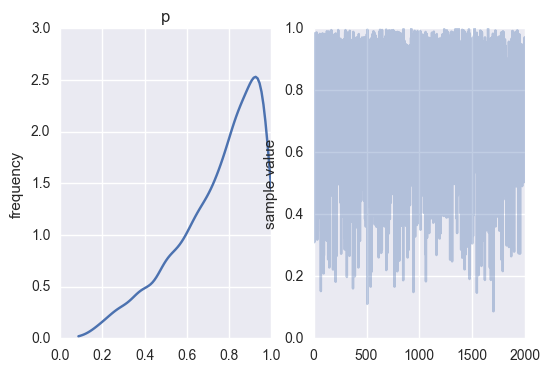

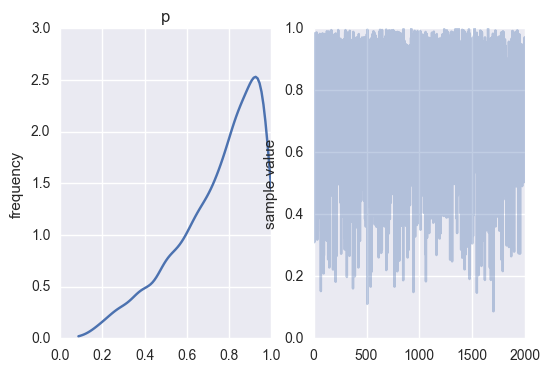

In [4]:
coins_fit.plot()

**Результат можно представить и в другой форме (проценты в шапке таблицы это квантили):**

In [5]:
coins_fit

Inference for Stan model: anon_model_eb876e7a7a808168a39b9cadca2846de.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p      0.75  5.9e-3    0.2   0.27   0.63    0.8   0.91   0.99   1106    1.0
lp__  -2.82    0.03   0.73  -4.83  -3.08  -2.53  -2.32  -2.25    679    1.0

Samples were drawn using NUTS at Sat Mar  4 17:29:39 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [6]:
coins_array = coins_fit.extract()

**Вытащим выборку параметра $p$ и выведем несколько первых значений:**

In [7]:
p = coins_array["p"]

In [8]:
p[0:20]

array([ 0.91397949,  0.79140088,  0.93180435,  0.96066562,  0.94790662,
        0.84336321,  0.3099252 ,  0.61702983,  0.75175235,  0.70076604,
        0.57829207,  0.62729455,  0.87431426,  0.96892456,  0.98442341,
        0.67416391,  0.8913617 ,  0.94187272,  0.91375261,  0.58711159])

**Апостериорное среднее:**

In [9]:
np.mean(p)

0.75013970732090818

**Апостериорная медиана:**

In [10]:
np.median(p)

0.80135336848392669

**Апостериорная вероятность $P(p > 0.7 | y_1=1,y_2=1)$:**

In [11]:
np.mean(p > 0.7)

0.66100000000000003

C:\Users\afche\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


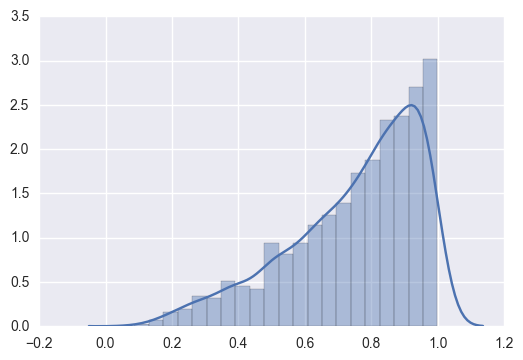

In [12]:
sns.distplot(p)

**На рисунке хорошо видно, что убывающая часть оценённой функции плотности — это просто особенность сглаживания :)**